In [2]:
import pandas as pd
import re
import os
from os import path
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
from scipy import interpolate
import numpy as np
import pylab as py
from pykrige.ok import OrdinaryKriging
from pyproj import Transformer
from scipy.interpolate import Rbf

In [3]:
df = pd.read_csv("Bogota_lluvia_diario.csv")
df.head()

,Unnamed: 0,Estacion,Year,Mes,Dia,Valor,Latitud,Longitud
0,0,21190130,1966,3,5,1.0,4.016667,-74.266667
1,1,21190130,1966,3,6,6.0,4.016667,-74.266667
2,2,21190130,1966,3,7,0.0,4.016667,-74.266667
3,3,21190130,1966,3,8,3.0,4.016667,-74.266667
4,4,21190130,1966,3,9,0.0,4.016667,-74.266667


<ipython-input-4-e5867658e8a2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['y'] = cartesian[0]
<ipython-input-4-e5867658e8a2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['x'] = cartesian[1]


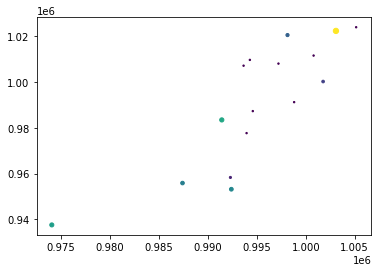

In [4]:
#Filtramos para la fecha deseada
year = 2019
mes =11
dia = 4
df_y = df[df['Year']== year]
df_m = df_y[df_y['Mes'] == mes]
df_d = df_m[df_m['Dia'] == dia]
#Cambiamos el sistema de coordenadas

#Primero, creamos la función que nos va a cambiar la proyección
proyectadas = Transformer.from_crs('EPSG:4326' , 'EPSG:3116')

#Segundo, Aplicamos la proyección

cartesian = proyectadas.transform(df_d['Latitud'].to_numpy(), df_d['Longitud'].to_numpy())
#Añadimos las nuevas columnas
df_d['y'] = cartesian[0]
df_d['x'] = cartesian[1]
df_d


plt.scatter(df_d.x, df_d.y, s = 2+df_d.Valor*5, c = df_d.Valor)



In [5]:
x = df_d['x'].to_numpy()
y = df_d['y'].to_numpy()
z = df_d['Valor'].to_numpy()

In [6]:
estim = interpolate.Rbf(x,y,z, function = 'multiquadric')
estim2 =  interpolate.Rbf(x,y,z, function = 'inverse_multiquadric')

In [7]:
min_y = df_d.y.min()
max_y = df_d.y.max()

min_x = df_d.x.min()
max_x = df_d.x.max()

In [8]:
grid_x = np.linspace(min_x, max_x, num = 60, endpoint= False)
grid_y = np.linspace(min_y, max_y, num = 60, endpoint= False)
xnew, ynew = np.meshgrid(grid_x, grid_y)

In [9]:
znew = estim(xnew, ynew)
znew2 = estim2(xnew, ynew)

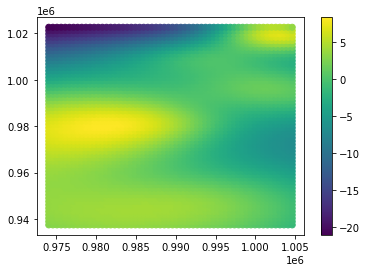

In [10]:
cax = plt.scatter(xnew,ynew, c=znew)
cbar = plt.colorbar(cax,fraction = 0.15)

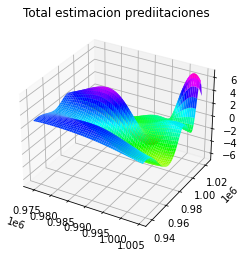

In [30]:
ax = plt.axes(projection='3d')
ax.plot_surface(xnew, ynew, znew2, rstride=1, cstride=1,
                cmap='gist_rainbow', edgecolor='none')
ax.set_title('Total estimacion prediitaciones');

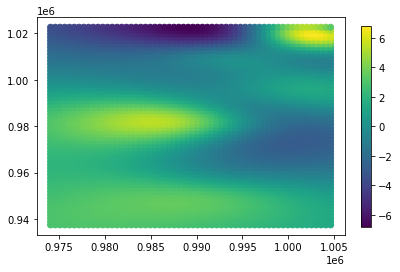

In [32]:
cax = plt.scatter(xnew,ynew, c=znew2)
cbar = plt.colorbar(cax,fraction = 0.03)

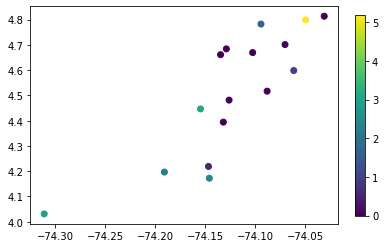

In [33]:
cor = plt.scatter(df_d.Longitud, df_d.Latitud, c = df_d.Valor)
cbar = plt.colorbar(cor,fraction = 0.03)

array([[ 2.9       ,  2.92365607,  2.94449381, ...,  1.45867732,
         1.4053719 ,  1.35279165],
       [ 2.95320536,  2.97959628,  3.00332874, ...,  1.4974067 ,
         1.43941557,  1.38235036],
       [ 2.98256588,  3.01177838,  3.03860635, ...,  1.52597281,
         1.46312923,  1.40145942],
       ...,
       [-3.19008979, -3.26772138, -3.34771998, ...,  6.70492017,
         6.42391408,  6.00108015],
       [-3.36906851, -3.45351759, -3.54076202, ...,  6.1491241 ,
         5.7323501 ,  5.17121235],
       [-3.5243479 , -3.61397468, -3.70666029, ...,  4.60225226,
         4.05725754,  3.37799289]])

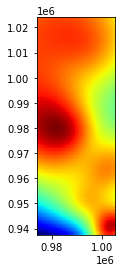

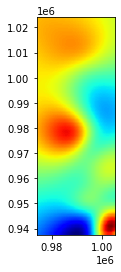

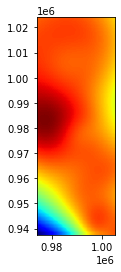

In [34]:
py.figure(221)
py.clf()
py.imshow(znew, extent=[min_x,max_x,min_y,max_y], cmap = py.cm.jet)
py.figure(222)
py.clf()
py.imshow(znew2, extent=[min_x,max_x,min_y,max_y], cmap = py.cm.jet)
z3 = znew - znew2
py.figure(223)
py.clf()
py.imshow(z3, extent=[min_x,max_x,min_y,max_y], cmap = py.cm.jet)
znew2

In [35]:
inter = interp2d(df_d['y'], df_d['x'], df_d['Valor'], kind = 'cubic', fill_value = -1)

In [36]:
inter(4.196667,-74.190944)

array([-1.])

In [37]:
min_y = df_d.y.min()
max_y = df_d.y.max()

min_x = df_d.x.min()
max_x = df_d.x.max()

In [38]:
grid_x = np.linspace(min_x, max_x, num = 60, endpoint= False)
grid_y = np.linspace(min_y, max_y, num = 60, endpoint= False)


In [39]:
xg, yg = np.meshgrid(grid_x, grid_y)
xg = xg.ravel()
yg = yg.ravel()

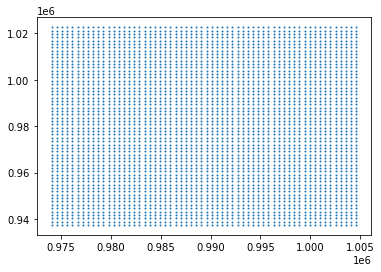

In [40]:
plt.scatter(xg, yg, s = 1)

In [41]:
df2 = df_d[['x', 'y']]
df3 = df_d['Valor']

In [42]:
points_x = np.array(df2.x)
points_y = np.array(df2.y)
values = np.array(df3)

In [43]:
interpolador = interp2d(points_x, points_y, values, kind = 'cubic')

In [44]:
import skimage.measure
est_valor = interpolador(xg, yg)
z = skimage.measure.block_reduce(est_valor, (60,60), np.mean)
z.shape
z

array([[   2.9       ,  -69.6281944 , -134.78179613, ..., -620.12604655,
        -722.78076072, -834.149393  ],
       [ 235.9150129 ,  151.87283339,   75.48469684, ..., -584.12770881,
        -681.64349695, -787.56788703],
       [ 448.78618233,  354.43223178,  267.96668643, ..., -549.52346078,
        -642.05808726, -742.69787184],
       ...,
       [-236.90179967, -224.47044449, -212.48087583, ...,    4.46172245,
           4.68584026,    4.93154992],
       [-136.01768375, -130.80012744, -125.6849911 , ...,    4.50511193,
           4.24387657,    3.8930479 ],
       [ -18.98926197,  -22.07707675,  -24.87910675, ...,    4.70827475,
           3.92421791,    2.92644676]])

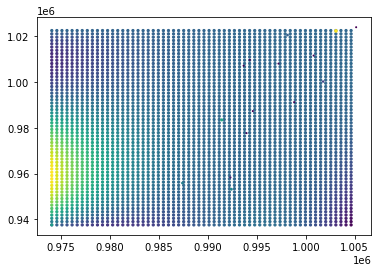

In [176]:
plt.scatter(xg, yg, s = 5, c = z)
plt.scatter(df_d.x, df_d.y, s = 1+df_d.Valor, c = df_d.Valor)

## Interpolación Krigging 

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 1.01501127615074
Full Sill: 2.642930136827287
Range: 9861.171487146008
Nugget: 1.627918860676547 



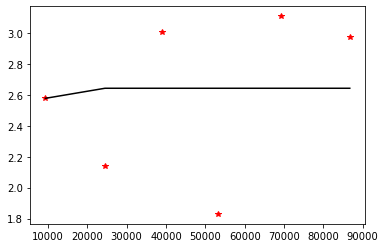

Calculating statistics on variogram model fit...


In [47]:
#Creamos el objeto que hará ajustará la interpolación

OK = OrdinaryKriging(x, y, values, variogram_model = 'gaussian', verbose = 'True', enable_plotting = 'True', coordinates_type = 'euclidean')

In [178]:
zvals, sd = OK.execute('grid', grid_x, grid_y)

Executing Ordinary Kriging...



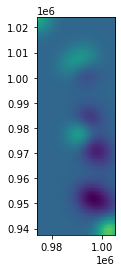

In [179]:
cax = plt.imshow(zvals, extent = (min_x, max_x, min_y, max_y))

In [180]:
zvals.data

array([[2.9       , 1.84750718, 1.83129704, ..., 1.20045703, 1.2004557 ,
        1.20045476],
       [1.81167381, 1.80652654, 1.79134319, ..., 1.20046917, 1.20046406,
        1.20046041],
       [1.7027403 , 1.69851077, 1.68603401, ..., 1.20050825, 1.20049094,
        1.20047859],
       ...,
       [1.20045274, 1.2004527 , 1.20045263, ..., 2.0687175 , 2.01836712,
        1.95378247],
       [1.20045277, 1.20045275, 1.20045273, ..., 2.17763503, 2.10887284,
        2.02470905],
       [1.20045278, 1.20045277, 1.20045276, ..., 2.12313491, 2.04352525,
        1.94976332]])

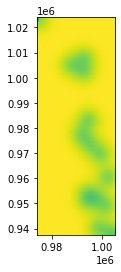

In [181]:
cax = plt.imshow(sd, extent = (min_x, max_x, min_y, max_y))

In [182]:
sd[0]

masked_array(data=[-2.9342418563908125e-16, 2.3424112037907654,
                   2.363928360804389, 2.3976698393436298,
                   2.4407953241395233, 2.4899330957912733,
                   2.5416290769928875, 2.5927500172216313,
                   2.6407770526708547, 2.6839582275910536,
                   2.721322629430657, 2.7525854588351213,
                   2.77798740952027, 2.7981126559382408,
                   2.8137207766438115, 2.8256141200756915,
                   2.834548283985418, 2.8411828110013984,
                   2.8460631953820026, 2.8496234922608306,
                   2.852199931443239, 2.854048469350103, 2.85536196170515,
                   2.856284892765967, 2.856925099197004,
                   2.8573627314232364, 2.857656997950072,
                   2.857851252149818, 2.857976872366889,
                   2.8580562558563423, 2.8581051411875356,
                   2.8581344033540335, 2.858151425005014,
                   2.8581611252366663, 2.85816

In [183]:
zvals, sd = OK.execute('points', 4.031028, -74.311167)


Executing Ordinary Kriging...



In [184]:
zvals

masked_array(data=[1.2004527845513049],
             mask=[False],
       fill_value=1e+20)

## Finalmente hagamos una ultima interpolación que nos puede ayudar con Scipy. Es la interpolación RBF